In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F


In [ ]:
with open("./drive/MyDrive/embed_tp_words2concept/dev.embed.layer-5", "r") as f:
    lines = f.readlines()
    X_train = []      
    for i, line in enumerate(lines):
        value = line.split(',')
        X_train.append(value[2])
    train = []   
    for i in range(len(X_train)):
        train.append(X_train[i].split(' '))
    
    with open("./dev_formated_data5.tsv", "w") as d:
      for i in range(len(train)):
        for j in range(len(train[i])):
          d.write(train[i][j])
          d.write('\t')

In [ ]:

def get_target():
  labels = []
  target = {}
  with open("./drive/MyDrive/embed_tp_words2concept/train.embed.layer-1") as f:

      lines = f.readlines()

      for line in lines:
          new = True
          first_coma = line.find(",")
          new_line = line[first_coma+1:]
          label = new_line.split(',')[0]
          for x in labels:
              if x == label:
                  new = False
          if new == True:
              labels.append(label)
  x = 0
  for label in labels:
      target[label] = x
      x += 1
  return target

In [ ]:
target = get_target()

In [ ]:
target['reponse']

0

In [ ]:
import numpy as np
from torch.utils.data import TensorDataset

def labelencoder(y):
  label_encoder = LabelEncoder()
  labeled = [target[label] for label in y]
  print(labeled)
  integer_encoded = torch.tensor(labeled)  
  return integer_encoded

def getDataset(filepath): 
  X_train = []
  y_train = []
  with open(filepath, "r") as f:
      lines = f.readlines()
      
      for i, line in enumerate(lines):
          value = line.split(',')
          X_train.append(value[2])
          y_train.append(value[1])
  train = []   
  for i in range(len(X_train)):
      train.append(X_train[i].split(' '))

  print(type(y_train))
  train_data = np.array(train).astype(np.float32)
  
  train_data = torch.from_numpy(train_data)
  print(train_data)
  y_train = labelencoder(y_train)

  print(y_train)
  return TensorDataset(train_data, y_train)

In [ ]:
train_dataset = getDataset('./drive/MyDrive/embed_tp_words2concept/train.embed.layer-5')

print(train_dataset)

<class 'list'>
tensor([[-4.8277e-02,  3.5003e-01, -1.6837e-01,  ...,  2.3323e-01,
          4.4265e-01, -3.6575e-02],
        [-2.4362e-02,  7.2864e-01,  5.9777e-03,  ..., -2.0401e-01,
          2.1802e-01,  1.0495e-04],
        [-2.2578e-04,  5.0975e-01, -3.9681e-01,  ...,  1.0841e-01,
          5.0132e-01, -4.0235e-02],
        ...,
        [ 3.1294e-01,  1.5822e-01,  5.2329e-02,  ..., -2.2919e-01,
          5.4492e-01, -5.2894e-02],
        [-1.0241e+00, -6.1428e-01, -4.4776e-01,  ..., -6.0515e-03,
          3.1617e-01, -1.8197e-02],
        [ 3.0169e-01,  5.7017e-02, -3.2163e-02,  ...,  1.9596e-01,
         -2.4675e-02,  8.1981e-03]])
[0, 0, 0, 1, 2, 3, 3, 4, 5, 6, 7, 8, 9, 10, 5, 7, 0, 1, 11, 12, 12, 6, 0, 13, 14, 15, 15, 1, 2, 1, 14, 16, 17, 2, 14, 15, 13, 7, 8, 7, 8, 9, 10, 13, 18, 19, 15, 14, 1, 2, 13, 1, 11, 1, 11, 20, 9, 10, 7, 8, 0, 0, 0, 14, 15, 13, 6, 1, 11, 6, 7, 21, 0, 0, 6, 22, 23, 24, 4, 7, 8, 9, 10, 14, 15, 0, 0, 21, 6, 25, 23, 24, 4, 0, 26, 9, 10, 1, 11, 5, 5, 21, 14

In [ ]:
dev_dataset = getDataset('./drive/MyDrive/embed_tp_words2concept/dev.embed.layer-5')

<class 'list'>
tensor([[-0.2192,  0.7175, -0.3730,  ..., -0.5770,  0.7009, -0.0051],
        [ 0.3139,  0.8504, -0.2418,  ..., -0.5009,  0.6392,  0.0080],
        [ 0.7719, -0.1160, -0.0980,  ...,  0.1636,  0.1563,  0.0605],
        ...,
        [ 0.1005, -0.3822, -0.0318,  ...,  0.5809,  0.1022,  0.0381],
        [ 0.2468, -0.2802, -0.0996,  ...,  0.4714, -0.1045,  0.0041],
        [ 0.2623,  0.1067, -0.0644,  ...,  0.1566,  0.9239,  0.0693]])
[0, 0, 33, 11, 0, 30, 34, 30, 34, 4, 4, 37, 0, 0, 3, 3, 15, 0, 42, 0, 14, 6, 2, 0, 30, 56, 0, 9, 10, 6, 11, 4, 14, 15, 0, 0, 0, 7, 8, 0, 18, 19, 27, 9, 10, 20, 0, 6, 7, 8, 33, 21, 9, 10, 6, 7, 13, 7, 21, 4, 8, 37, 0, 0, 13, 1, 11, 1, 11, 1, 33, 21, 27, 9, 10, 7, 8, 6, 51, 0, 7, 8, 4, 0, 42, 0, 3, 3, 6, 3, 3, 4, 13, 3, 3, 4, 7, 8, 9, 10, 20, 31, 27, 7, 0, 4, 0, 0, 7, 0, 13, 48, 48, 7, 0, 0, 31, 13, 27, 0, 30, 34, 4, 6, 30, 6, 0, 0, 30, 56, 2, 6, 3, 3, 4, 7, 19, 53, 14, 15, 13, 15, 6, 7, 8, 4, 60, 14, 45, 3, 3, 11, 20, 9, 10, 13, 27, 0, 0, 0, 6, 2

In [ ]:


train_dataloader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
dev_dataloader = DataLoader(dataset=dev_dataset, batch_size=64, shuffle=False)
for X, y in dev_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape} {X.dtype}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 800]) torch.float32
Shape of y: torch.Size([64]) torch.int64


In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(800, 256),
            #nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 73)
        )

    def forward(self, x):
        
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=800, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=73, bias=True)
  )
)


In [ ]:
# Définition de la fonction de coût et l'optimiseur
import torch.optim as optim 
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)
#ici weight_decay c'est pour specifier la regulation L2
# Define the learning rate scheduler
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=2, verbose=True)


In [ ]:

# Entrainement du modèle
# Définir la patience et initialiser les variables pour le early stopping
patience = 10
best_dev_loss = float('inf')
num_bad_epochs = 0

num_epochs = 70
loss_history = []
accuracy_history = []
for epoch in range(num_epochs):
    for i, (X, y) in enumerate(train_dataloader):
        
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        outputs = model(X)
        loss = loss_fn(outputs, y)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
           print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                  epoch, i * len(X), len(train_dataloader.dataset),
                  100. * i / len(train_dataloader), loss.item()))

    # Validation après chaque epoch
    
    size = len(dev_dataloader.dataset)
    num_batches = len(dev_dataloader)
        
    dev_loss, correct = 0, 0
    
    total = 0
    model.eval()
    with torch.no_grad():
        for X, y in dev_dataloader:
           
            X, y = X.to(device), y.to(device)
            pred = model(X)
           
            dev_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    dev_loss /= num_batches
    correct /= size
    loss_history.append(dev_loss)
    accuracy_history.append(correct)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {dev_loss:>8f} \n")
    
    # Vérifier si la perte de validation est la meilleure jusqu'à présent
    if dev_loss < best_dev_loss:
        best_dev_loss = dev_loss
        num_bad_epochs = 0
    else:
        num_bad_epochs += 1
        # Si la perte de validation est pire que la meilleure perte observée jusqu'à présent 
        # depuis plus de patience, arrêter l'entraînement
        if num_bad_epochs >= patience:
            print(f"Early stopping after {epoch+1} epochs")
            break

Train Epoch: 0 [0/30822 (0%)]	Loss: 4.321637
Train Epoch: 0 [6400/30822 (21%)]	Loss: 4.152410
Train Epoch: 0 [12800/30822 (41%)]	Loss: 3.454114
Train Epoch: 0 [19200/30822 (62%)]	Loss: 3.321159
Train Epoch: 0 [25600/30822 (83%)]	Loss: 3.113620
Test Error: 
 Accuracy: 30.4%, Avg loss: 2.901462 

Train Epoch: 1 [0/30822 (0%)]	Loss: 2.992625
Train Epoch: 1 [6400/30822 (21%)]	Loss: 2.983729
Train Epoch: 1 [12800/30822 (41%)]	Loss: 2.654403
Train Epoch: 1 [19200/30822 (62%)]	Loss: 2.082944
Train Epoch: 1 [25600/30822 (83%)]	Loss: 2.249847
Test Error: 
 Accuracy: 66.8%, Avg loss: 1.758775 

Train Epoch: 2 [0/30822 (0%)]	Loss: 1.615112
Train Epoch: 2 [6400/30822 (21%)]	Loss: 1.597801
Train Epoch: 2 [12800/30822 (41%)]	Loss: 1.602368
Train Epoch: 2 [19200/30822 (62%)]	Loss: 1.481477
Train Epoch: 2 [25600/30822 (83%)]	Loss: 1.568224
Test Error: 
 Accuracy: 73.0%, Avg loss: 1.235280 

Train Epoch: 3 [0/30822 (0%)]	Loss: 1.229475
Train Epoch: 3 [6400/30822 (21%)]	Loss: 1.543672
Train Epoch: 3 [12

Text(0.5, 1.0, "accuracy du modèle en fonction du nombre d'epoch ( Couche 5 )")

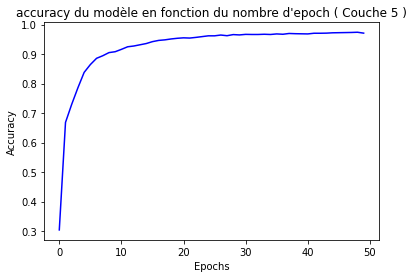

In [ ]:
import matplotlib.pyplot as plt


xlabel = [ i for i in range(epoch+1)]

plt.plot(xlabel, accuracy_history, c='b')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("accuracy du modèle en fonction du nombre d'epoch ( Couche 5 )")

# Evaluation du modèle sur les données de Test

In [ ]:
# import torchvision.models as models
# model = models.vgg16(pretrained=True)
# torch.save(model.state_dict(), './model_weights.pth')

In [ ]:
# model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
# model.load_state_dict(torch.load('./model_weights.pth'))

test_dataset = getDataset('./drive/MyDrive/embed_tp_words2concept/test.embed.layer-5')
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

<class 'list'>
tensor([[ 0.0514,  0.4755, -0.4818,  ..., -0.4855,  0.7396, -0.0369],
        [ 0.3206,  0.3517, -0.0294,  ...,  0.3175, -0.0841,  0.0119],
        [ 1.0779, -0.8035, -0.2944,  ...,  0.0030, -0.0987,  0.1167],
        ...,
        [ 0.1746, -0.0988, -0.1209,  ...,  0.0612, -0.0535,  0.0064],
        [ 0.6124, -0.4178, -0.0639,  ..., -0.0489,  0.0744,  0.1060],
        [-0.2407,  0.8138, -0.4277,  ..., -0.6356,  0.7748, -0.0414]])
[0, 6, 1, 2, 1, 11, 0, 41, 24, 6, 4, 35, 23, 24, 7, 8, 9, 10, 20, 2, 14, 15, 0, 0, 2, 15, 6, 1, 2, 20, 25, 23, 24, 0, 0, 21, 1, 9, 10, 0, 6, 56, 2, 1, 8, 9, 10, 13, 11, 27, 0, 0, 7, 8, 32, 9, 10, 5, 5, 0, 16, 17, 2, 20, 9, 10, 9, 10, 0, 0, 0, 0, 6, 14, 15, 6, 0, 0, 0, 21, 33, 7, 29, 8, 13, 7, 8, 3, 3, 0, 1, 11, 1, 9, 10, 0, 0, 13, 6, 3, 3, 13, 38, 11, 4, 35, 23, 24, 5, 0, 6, 3, 3, 4, 0, 6, 13, 27, 0, 0, 9, 10, 7, 8, 11, 20, 10, 3, 3, 13, 38, 14, 15, 0, 6, 0, 54, 19, 3, 3, 4, 13, 27, 22, 25, 23, 24, 0, 0, 2, 14, 13, 29, 9, 10, 0, 0, 6, 1, 2, 0, 4

In [ ]:
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape} {X.dtype}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 800]) torch.float32
Shape of y: torch.Size([64]) torch.int64


In [ ]:
# Test du modèle sur les données de test
from sklearn.metrics import confusion_matrix
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for X, y in test_loader:
        # y = y.type(torch.LongTensor)
        
        outputs = model(X)
        predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (outputs.argmax(1) == y).sum().item()
    
    print('Accuracy of the network on the test X: %d %%' % (100 * correct / total))


Accuracy of the network on the test X: 97 %
